In [1]:
! nvidia-smi

Fri Feb 21 15:14:42 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.01       Driver Version: 528.01       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   56C    P0     7W /  30W |      0MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
! pip install ultralytics


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Install YOLO v8

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
! yolo checks



Ultralytics 8.3.76 🚀 Python-3.13.1 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i7-1260P)
Setup complete ✅ (16 CPUs, 31.7 GB RAM, 231.6/934.6 GB disk)

OS                  Windows-11-10.0.22621-SP0
Environment         Windows
Python              3.13.1
Install             pip
RAM                 31.75 GB
Disk                231.6/934.6 GB
CPU                 12th Gen Intel Core(TM) i7-1260P
CPU count           16
GPU                 None
GPU count           None
CUDA                None

numpy               ✅ 2.1.1<=2.1.1,>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.1.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.15.1>=1.4.1
torch               ✅ 2.6.0>=1.8.0
torch               ✅ 2.6.0!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.21.0>=0.9.0
tqdm                ✅ 4.67.1>=4.64.0
psutil              ✅ 6.1.0
py-cpuinfo          ✅ 9.0.0
pandas    

## Train YOLO v8 on Custom Dataset

In [4]:
! pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kakMGW1gIRJM98ZDkcnW")
project = rf.workspace("yolov8-7lsof").project("licenseplatedetection-bcet9")
version = project.version(1)
dataset = version.download("yolov8")         


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


loading Roboflow workspace...
loading Roboflow project...


In [5]:
! yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

New https://pypi.org/project/ultralytics/8.3.78 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.76 🚀 Python-3.13.1 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i7-1260P)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=c:\Users\USER\Documents\cacaotalk\LicensePlateDetection-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina


train: Scanning C:\Users\USER\Documents\cacaotalk\LicensePlateDetection-1\train\labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]
train: Scanning C:\Users\USER\Documents\cacaotalk\LicensePlateDetection-1\train\labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<?, ?it/s]

val: Scanning C:\Users\USER\Documents\cacaotalk\LicensePlateDetection-1\valid\labels.cache... 20 images, 20 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
val: Scanning C:\Users\USER\Documents\cacaotalk\LicensePlateDetection-1\valid\labels.cache... 20 images, 20 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]
       1/20         0G      2.636      4.592       1.81        125        640:   0%|          | 0/8 [00:16<?, ?it/s]
       1/20         0G      2.636      4.592       1.81        125        640:  12%|█▎        | 1/8 [00:16<01:54, 16.37s/it]
       1/20         0

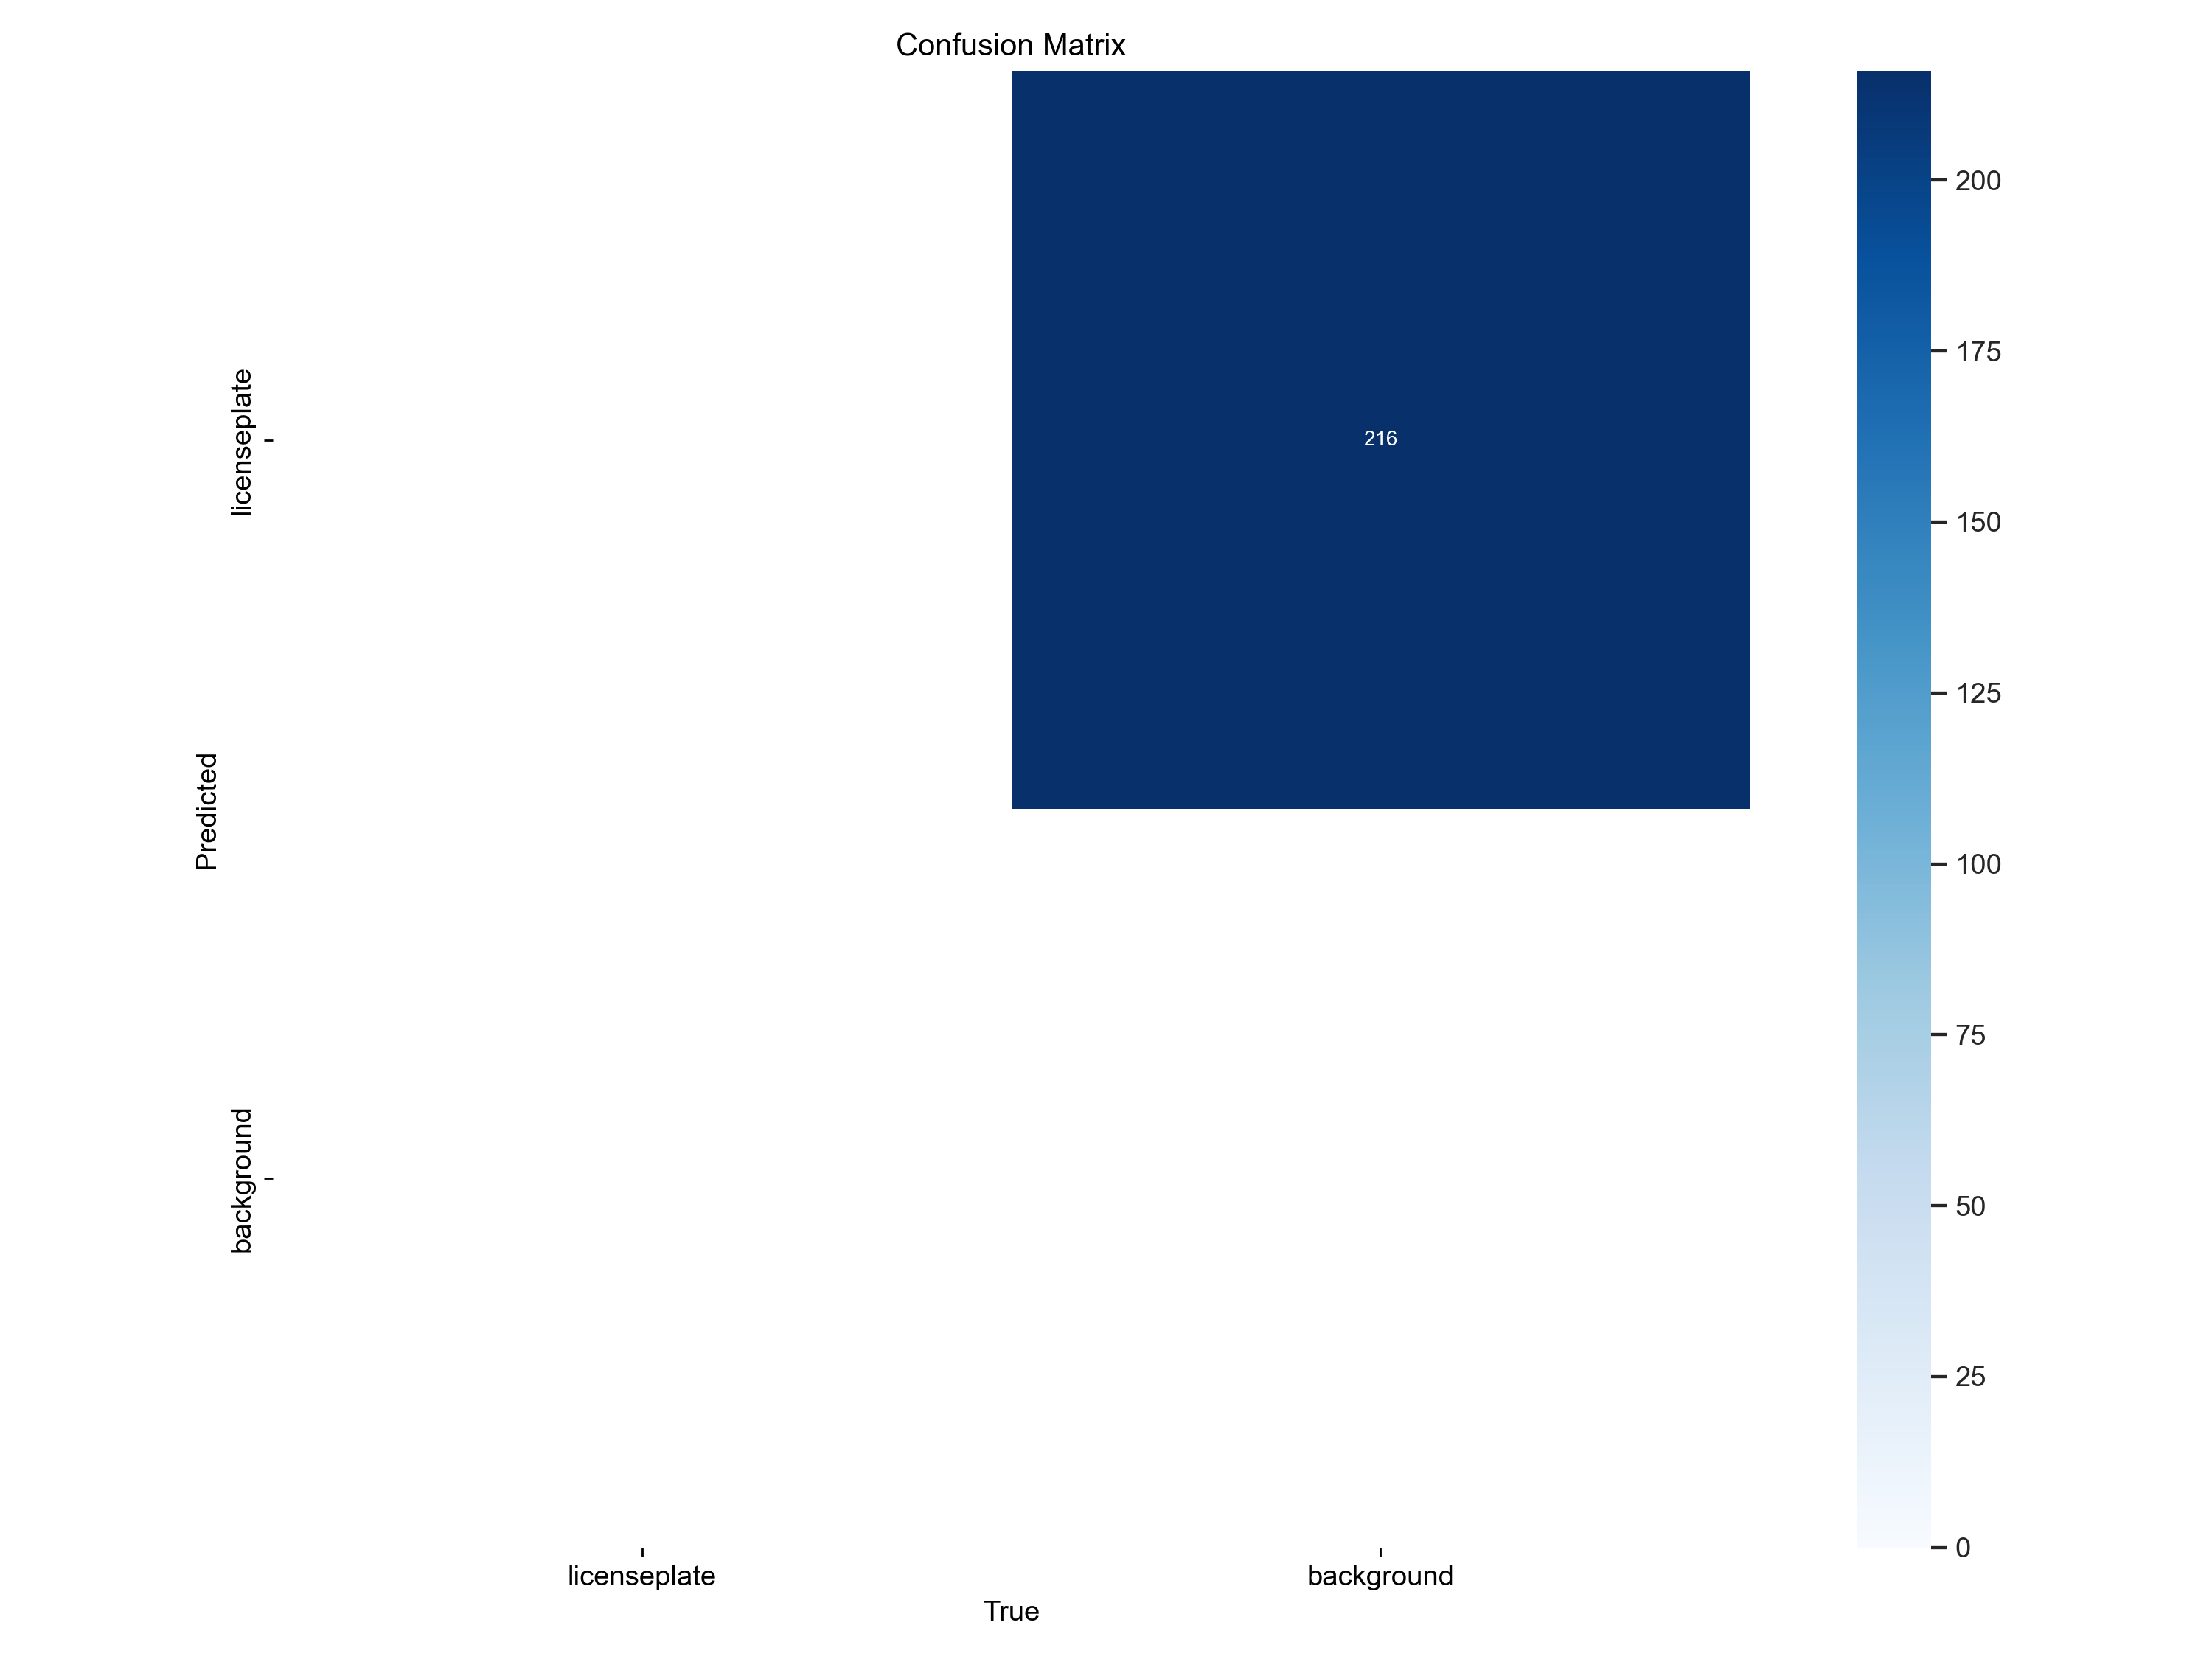

In [6]:
Image(filename=r"C:\Users\USER\Documents\cacaotalk\runs\detect\train5\confusion_matrix.png", width=600) 

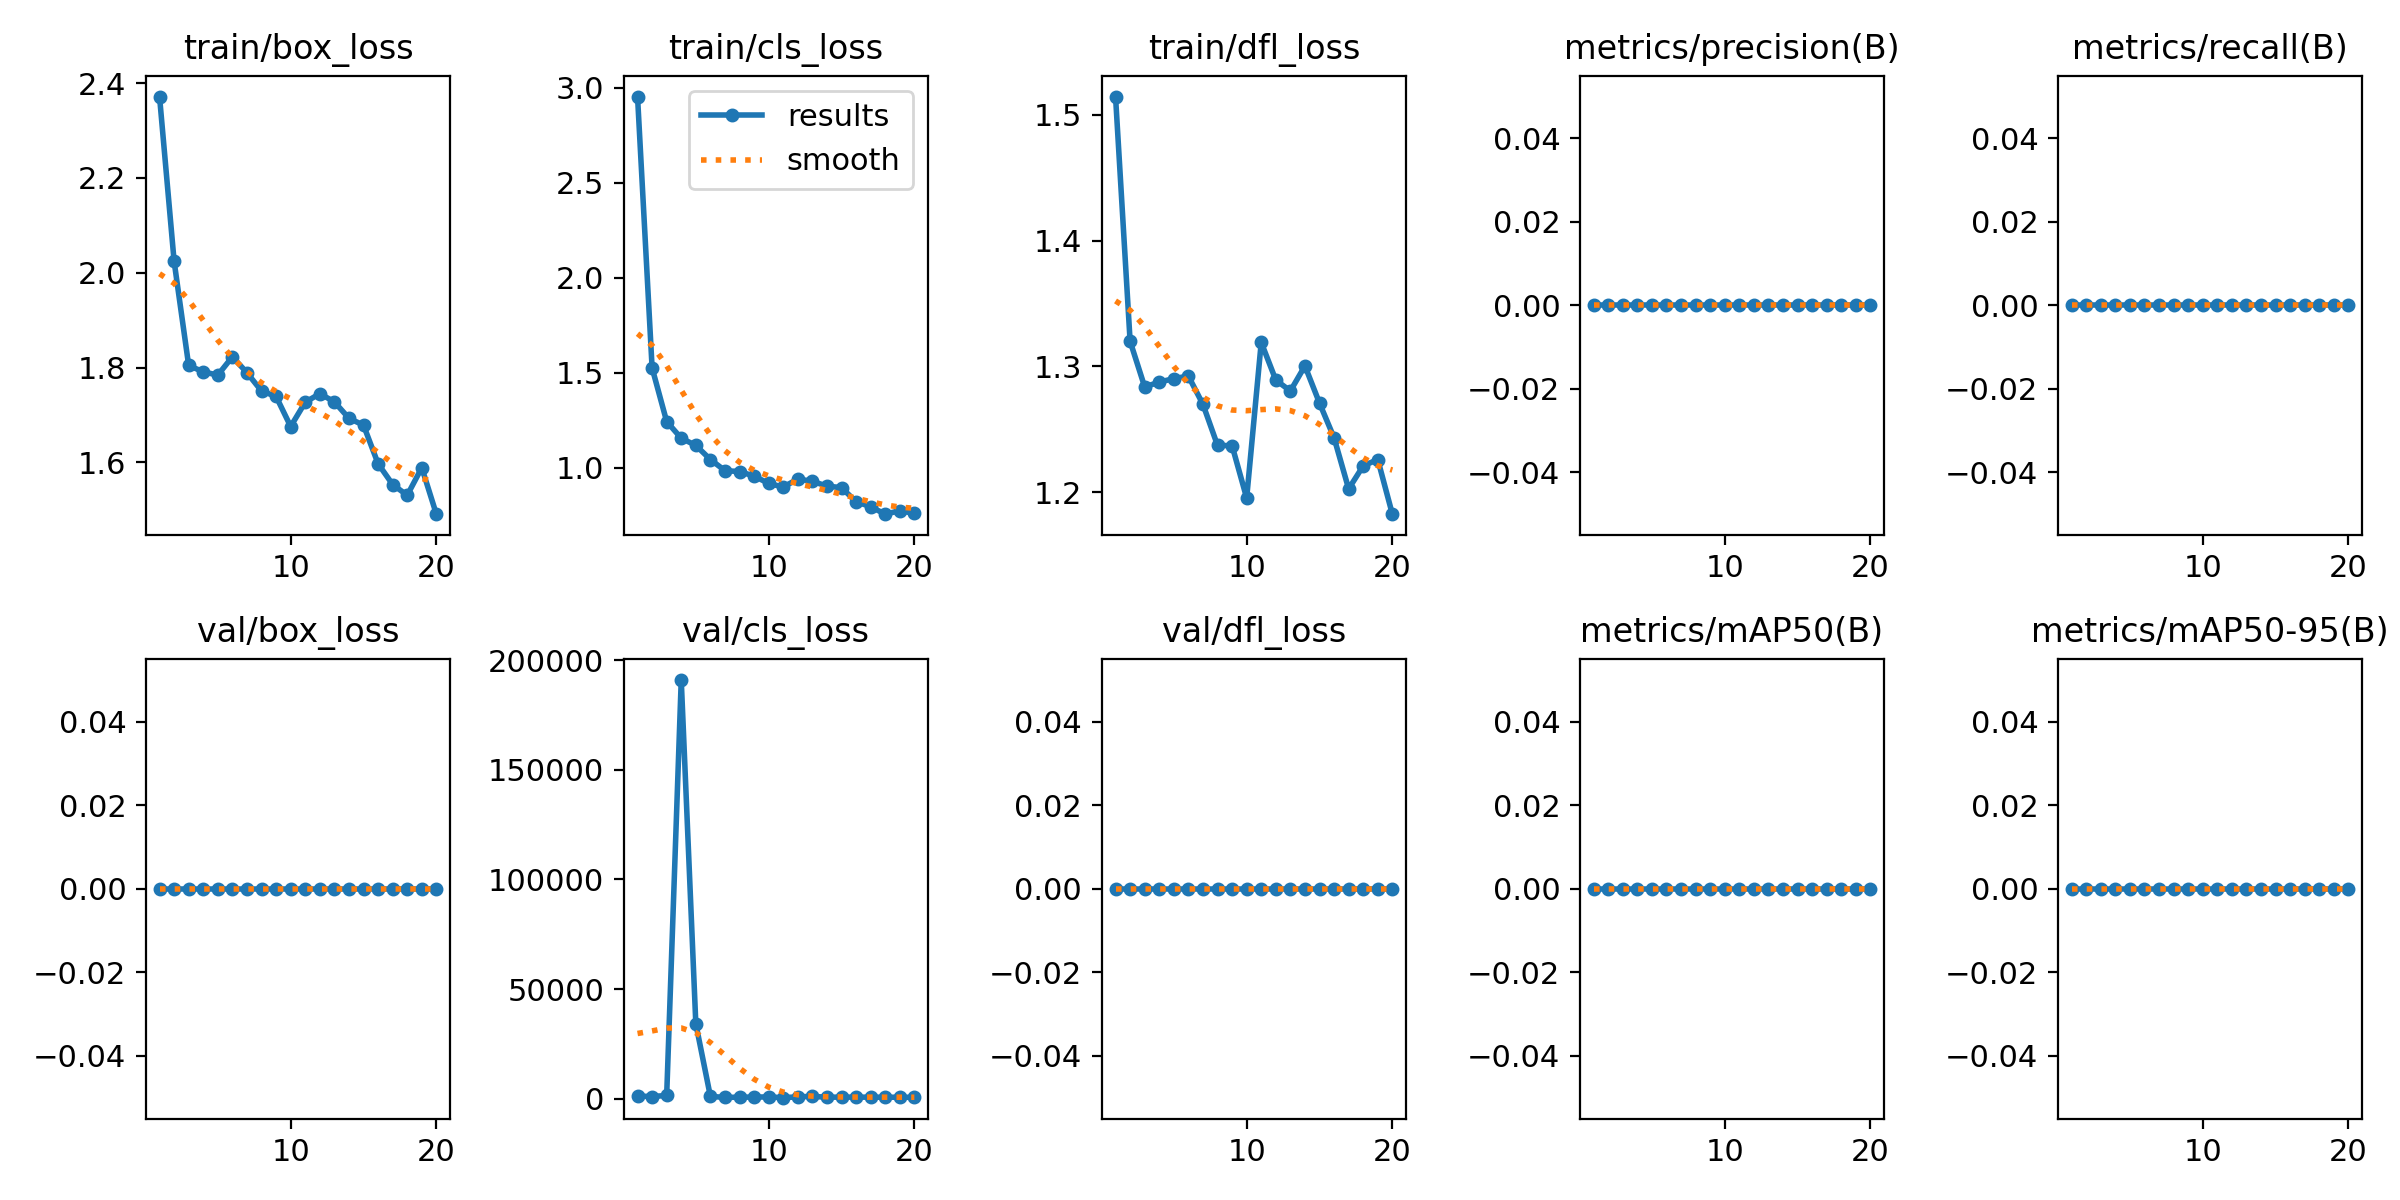

In [7]:
Image(filename=r"C:\Users\USER\Documents\cacaotalk\runs\detect\train5\results.png", width=600)

In [8]:
! yolo task=detect mode=predict model="C:\Users\USER\Documents\cacaotalk\runs\detect\train5\weights\best.pt" data={dataset.location}/data.yaml


WARNING ⚠️ 'source' argument is missing. Using default 'source=C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\ultralytics\assets'.
Ultralytics 8.3.76 🚀 Python-3.13.1 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i7-1260P)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/2 C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\ultralytics\assets\bus.jpg: 640x480 3 licenseplates, 297.3ms
image 2/2 C:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\ultralytics\assets\zidane.jpg: 384x640 1 licenseplate, 227.7ms
Speed: 2.7ms preprocess, 262.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


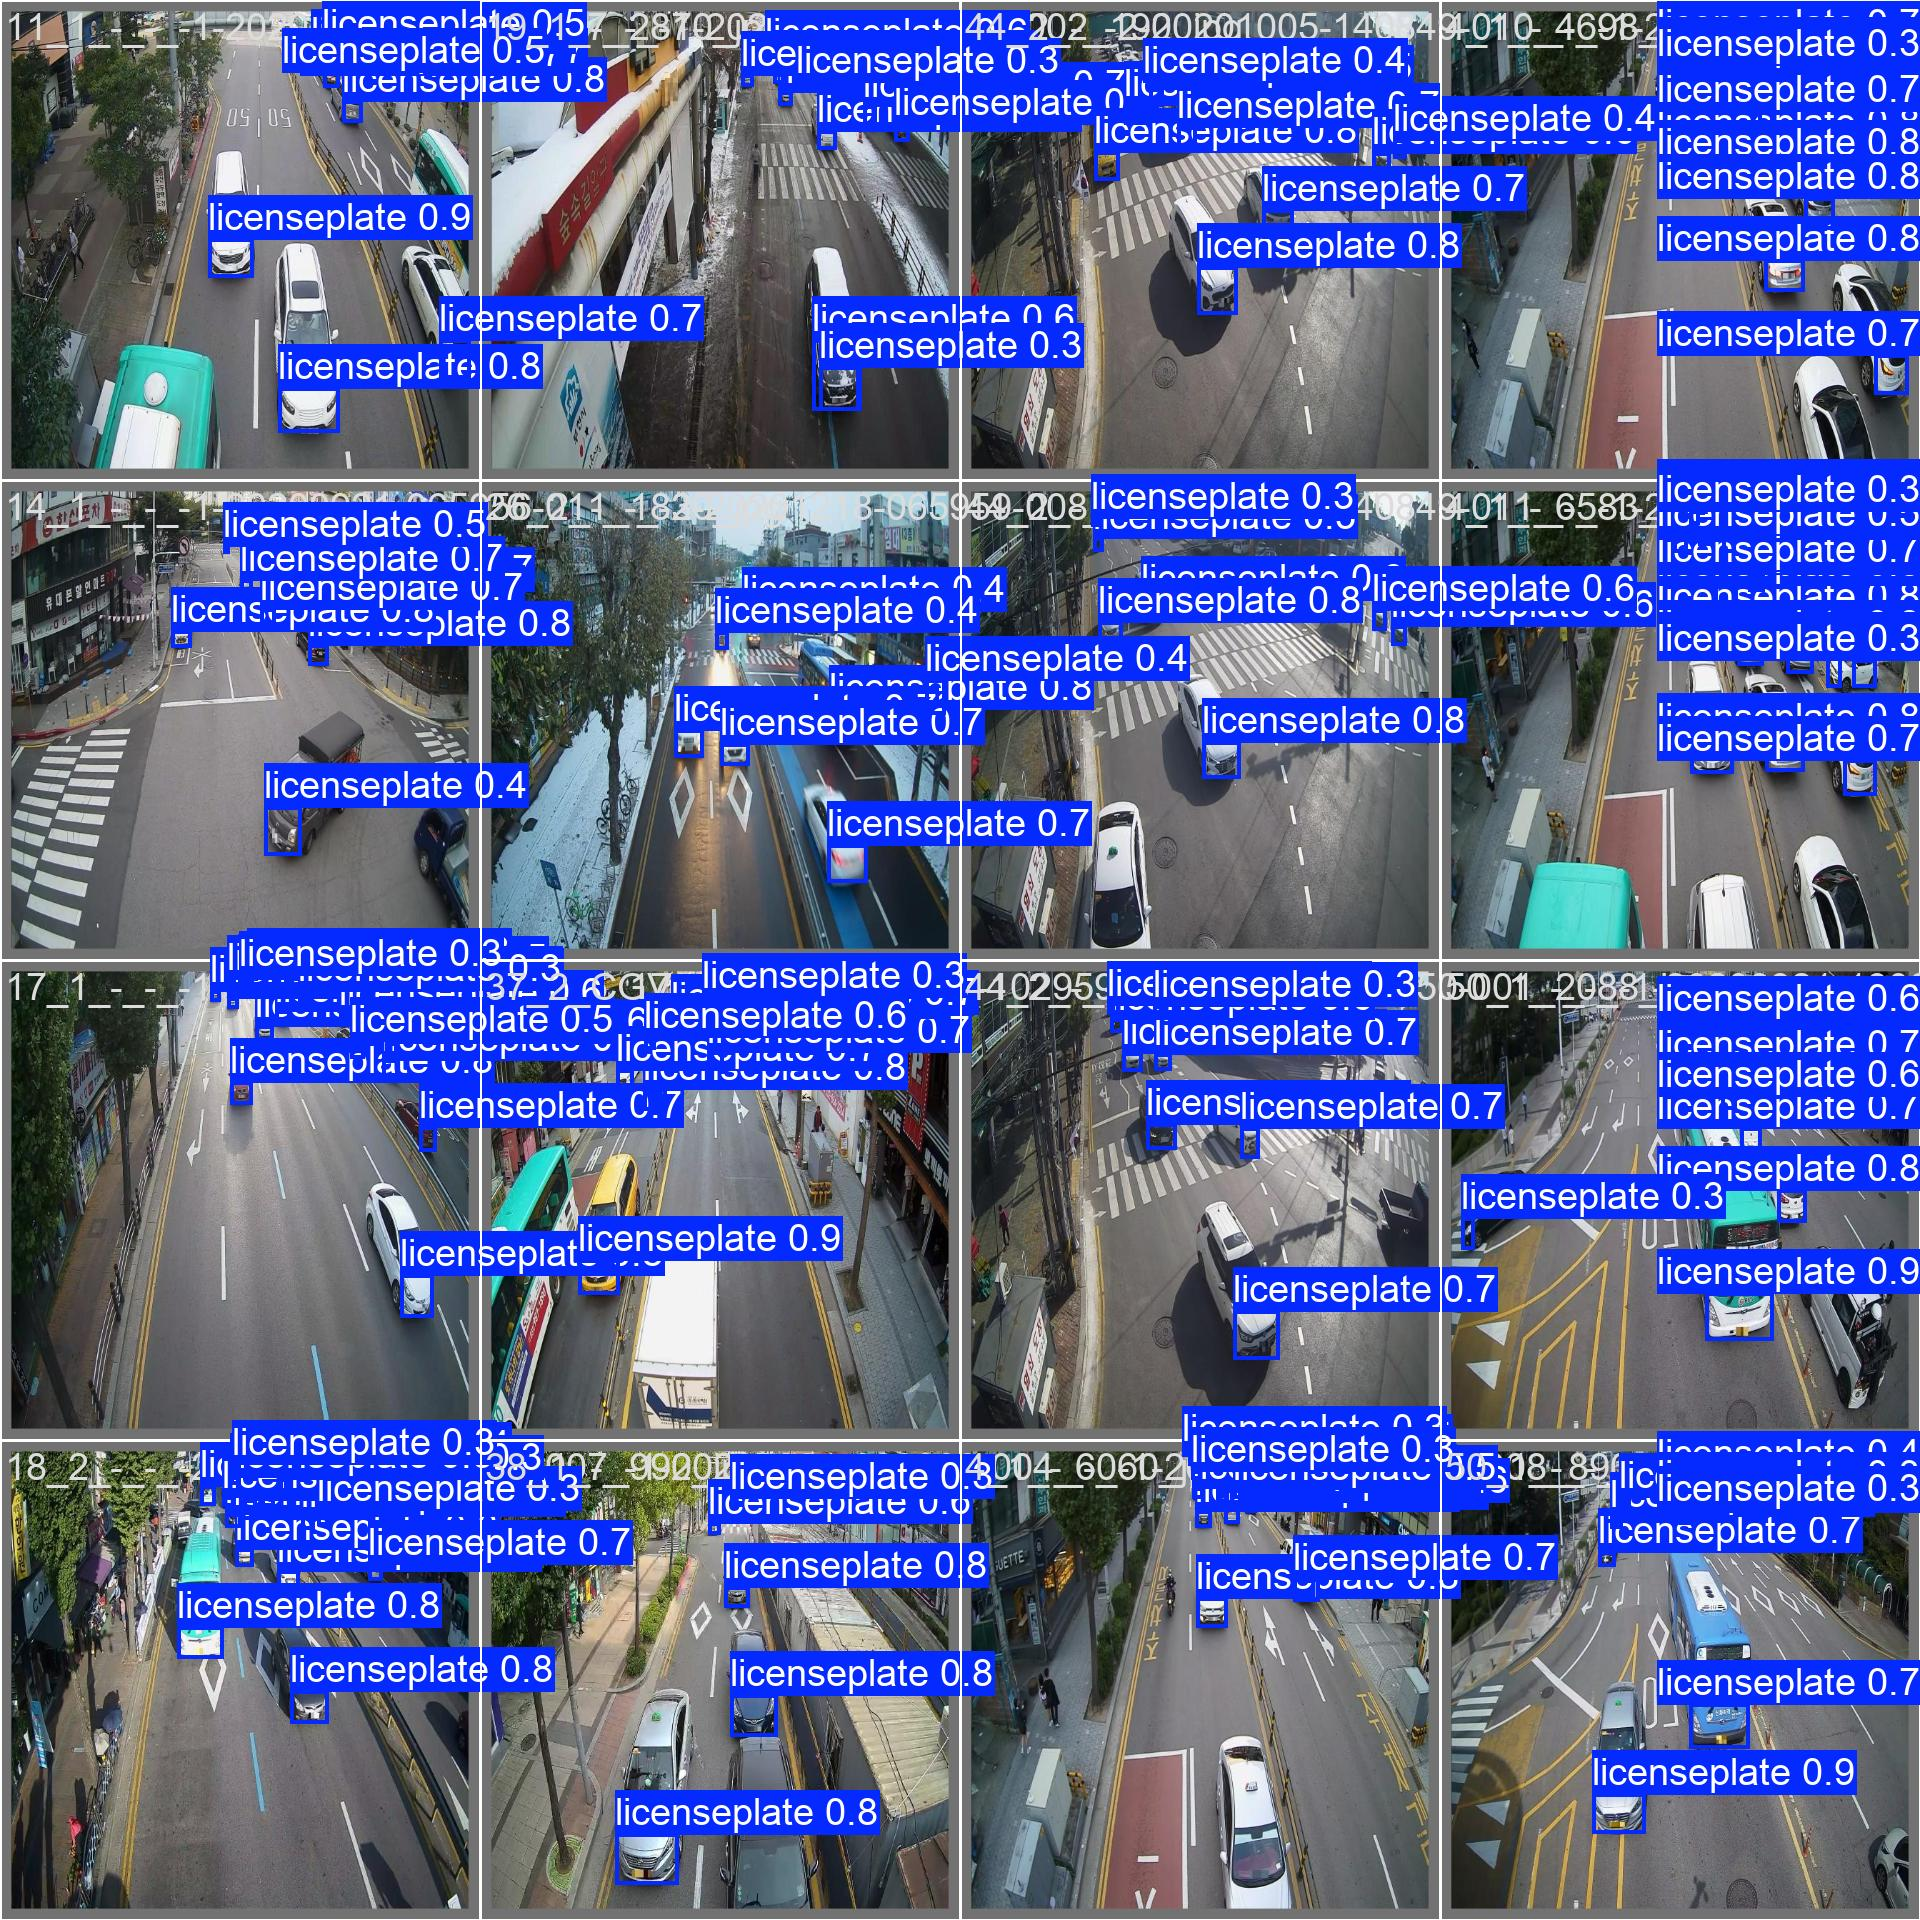

In [9]:
Image(filename=r"C:\Users\USER\Documents\cacaotalk\runs\detect\train5\val_batch0_pred.jpg", width=600) 